In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_excel('target_preprocessed_mean.xlsx')
data.describe()


,Unnamed: 0,Unnamed: 0.1,ID,MG,PH,K,NITRATE,SULPHATE,EC,CA,NA,CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR,RSC,YEAR
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,68.500000,68.500000,69.500000,86.519692,7.723858,70.759255,18.079712,169.626593,2309.536765,103.819528,270.904762,4.326923,402.462302,451.472388,0.988176,4.622381,-5.669462,2005.572464
std,39.981246,39.981246,39.981246,71.998993,0.442877,77.838748,42.231885,124.355228,1645.991383,82.153969,246.540724,12.602538,164.807178,474.914336,0.477475,3.294329,7.325394,0.903260
min,0.000000,0.000000,1.000000,0.000000,6.820000,0.000000,0.000000,0.020000,346.000000,2.000000,20.000000,0.000000,98.000000,25.000000,0.020000,0.470000,-35.110000,2005.000000
25%,34.250000,34.250000,35.250000,34.075000,7.400000,11.250000,3.225000,74.000000,999.000000,40.810000,101.750000,0.000000,282.500000,111.000000,0.822500,2.380000,-9.752500,2005.000000
50%,68.500000,68.500000,69.500000,73.125000,7.660000,70.759255,8.300000,169.626593,1917.500000,89.000000,270.904762,0.000000,402.462302,328.000000,0.988176,4.566190,-4.080000,2005.000000
75%,102.750000,102.750000,103.750000,111.532500,7.900000,70.759255,18.079712,187.500000,3090.000000,146.000000,298.750000,4.326923,486.500000,554.000000,1.120000,5.005000,0.000000,2006.000000
max,137.000000,137.000000,138.000000,356.000000,8.860000,330.000000,350.000000,744.000000,7920.000000,520.000000,1480.000000,96.000000,970.000000,2340.000000,3.200000,19.590000,5.770000,2008.000000


In [4]:
data['RSC'] = data['RSC'] + 35.11


In [27]:
data

,Unnamed: 0,Unnamed: 0.1,ID,SITENME,MG,PH,K,NITRATE,SULPHATE,EC,CA,NA,CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR,RSC,YEAR,Class Label
0,0,0,1,Vengalapuram,267.950000,7.280000,10.000000,276.000000,304.000000,5730.0,16.000000,850.000000,0.000000,878.000000,1304.0,1.640000,10.940000,26.660000,2008,D
1,1,1,2,Kavalur,94.850000,7.180000,3.000000,2.000000,12.000000,1069.0,24.000000,77.000000,0.000000,421.000000,163.0,1.340000,1.580000,33.010000,2008,B
2,2,2,3,Alangayam,226.140000,7.480000,0.000000,16.000000,150.000000,2830.0,20.000000,300.000000,0.000000,549.000000,631.0,0.990000,4.170000,24.510000,2008,B
3,3,3,4,Vaniyambadi1,211.550000,7.340000,5.000000,140.000000,264.000000,3600.0,20.000000,500.000000,0.000000,726.000000,680.0,1.650000,7.170000,28.610000,2008,D
4,4,4,5,Sangilikuppam,238.300000,7.220000,2.000000,174.000000,240.000000,2300.0,24.000000,152.000000,0.000000,537.000000,305.0,1.210000,2.050000,23.110000,2008,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133,133,134,Arakkonam-EW,12.000000,7.660000,25.000000,8.600000,29.000000,610.0,28.000000,80.000000,4.326923,250.000000,39.0,0.700000,3.190000,36.820000,2005,A
134,134,134,135,Arakkonam2,86.519692,7.723858,70.759255,18.079712,169.626593,740.0,103.819528,270.904762,4.326923,402.462302,60.0,0.988176,4.622381,29.440538,2005,B
135,135,135,136,Sholinghur,22.920000,7.600000,34.000000,2.000000,25.000000,525.0,50.000000,33.000000,0.000000,179.000000,53.0,0.390000,0.970000,33.660000,2005,B
136,136,136,137,Sholingar-EW,13.000000,7.640000,15.000000,15.000000,10.000000,560.0,26.000000,64.000000,4.326923,268.000000,25.0,0.800000,2.560000,37.140000,2005,A


In [5]:
X = data.iloc[:,4:18]  #independent columns
Y = data.iloc[:,-1]    #target column i.e price range

In [24]:
X

,MG,PH,K,NITRATE,SULPHATE,EC,CA,NA,CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR,RSC
0,267.950000,7.280000,10.000000,276.000000,304.000000,5730.0,16.000000,850.000000,0.000000,878.000000,1304.0,1.640000,10.940000,26.660000
1,94.850000,7.180000,3.000000,2.000000,12.000000,1069.0,24.000000,77.000000,0.000000,421.000000,163.0,1.340000,1.580000,33.010000
2,226.140000,7.480000,0.000000,16.000000,150.000000,2830.0,20.000000,300.000000,0.000000,549.000000,631.0,0.990000,4.170000,24.510000
3,211.550000,7.340000,5.000000,140.000000,264.000000,3600.0,20.000000,500.000000,0.000000,726.000000,680.0,1.650000,7.170000,28.610000
4,238.300000,7.220000,2.000000,174.000000,240.000000,2300.0,24.000000,152.000000,0.000000,537.000000,305.0,1.210000,2.050000,23.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,12.000000,7.660000,25.000000,8.600000,29.000000,610.0,28.000000,80.000000,4.326923,250.000000,39.0,0.700000,3.190000,36.820000
134,86.519692,7.723858,70.759255,18.079712,169.626593,740.0,103.819528,270.904762,4.326923,402.462302,60.0,0.988176,4.622381,29.440538
135,22.920000,7.600000,34.000000,2.000000,25.000000,525.0,50.000000,33.000000,0.000000,179.000000,53.0,0.390000,0.970000,33.660000
136,13.000000,7.640000,15.000000,15.000000,10.000000,560.0,26.000000,64.000000,4.326923,268.000000,25.0,0.800000,2.560000,37.140000


In [22]:
Y

0      D
1      B
2      B
3      D
4      B
      ..
133    A
134    B
135    B
136    A
137    B
Name: Class Label, Length: 138, dtype: object

## Univariate Selection

In [6]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [7]:
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [8]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Attribute         Score
5            EC  38613.786549
10     CHLORIDE  13224.573694
7            NA   7693.588618
8     CARBONATE   2151.868023
4      SULPHATE   1956.843606
9   BICARBONATE   1644.020392
0            MG   1564.409907
6            CA   1239.551794
3       NITRATE    752.583687
2             K    402.813030


## Feature Importance

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [10]:
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [11]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05064747 0.15557243 0.03577025 0.04966478 0.06120858 0.05452991
 0.08738181 0.0581233  0.08591305 0.03677378 0.05183119 0.14502706
 0.06086136 0.06669503]


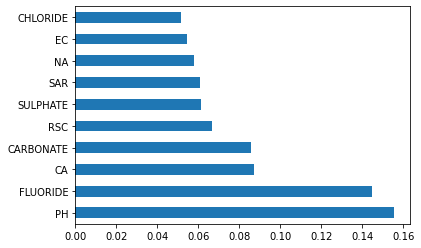

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation co-efficient

In [13]:
import seaborn as sns
import matplotlib.pyplot as pl

In [37]:
corrmat = data.corr()
top_corr_features = corrmat.index

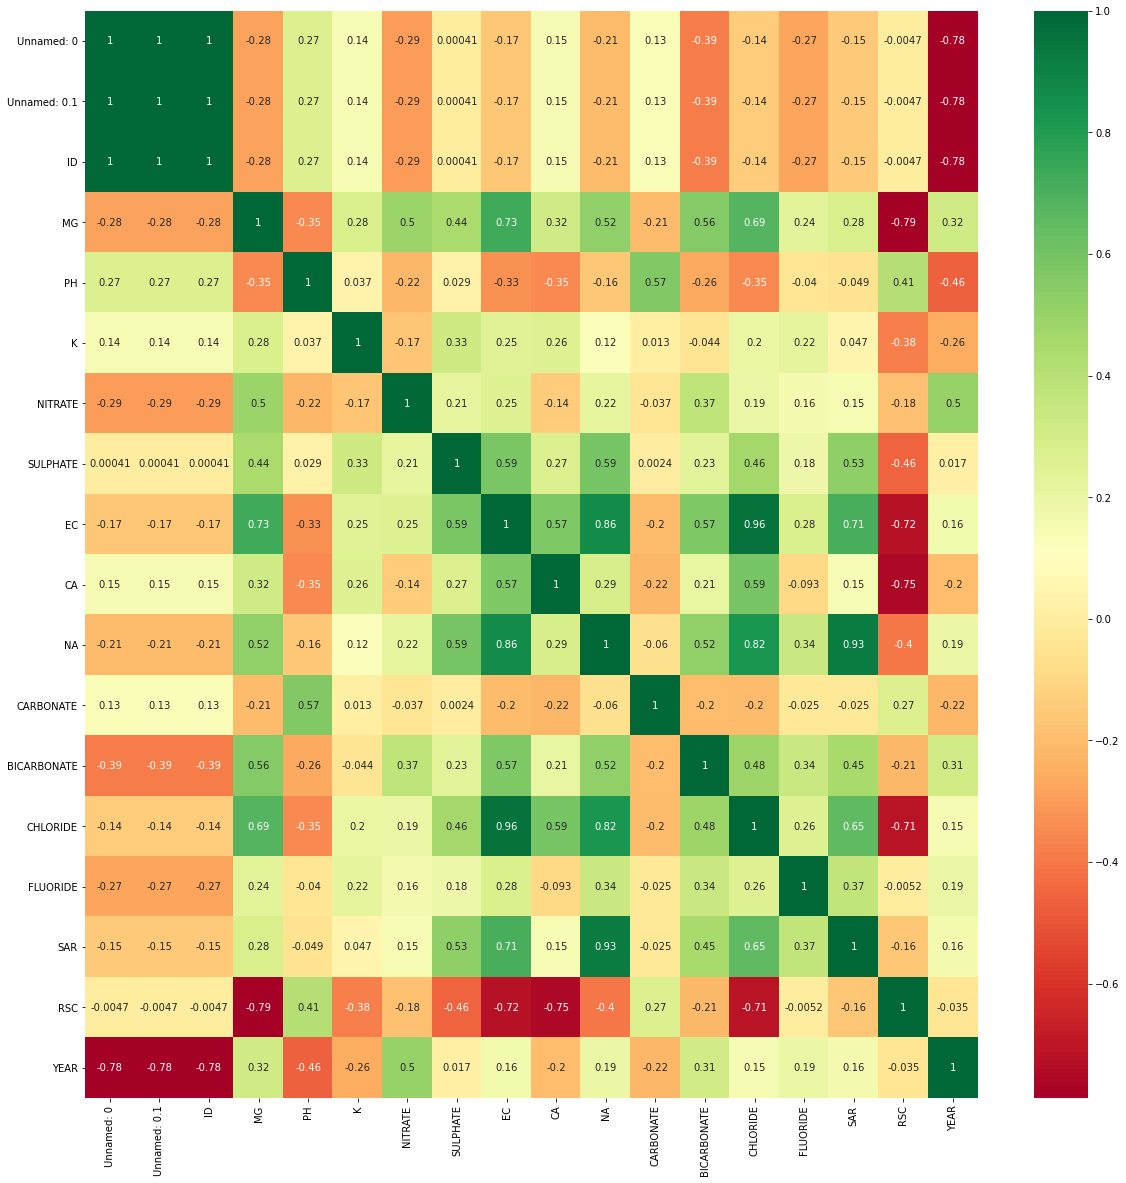

In [38]:
pl.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")